## 1. central limit theorem

<div>The Central Limit Theorem (CLT) states that, regardless of the underlying population distribution, the sampling distribution of the sample mean approaches a normal (Gaussian) distribution as the sample size \(n\) increases. Generally, a sample size of $(n\ge 30)$ is considered sufficient for this approximation, enabling statistical inference and hypothesis testing.</div>

 
<div>1.The drawing of the sample from the population should be random.<br>
2.The drawing of the sample should be independent of each other.<br>
3.The sample size should not exceed ten percent of the total population when sampling is done without replacement.<br>
4.Sample Size should be adequately large.<br>
5.CLT only holds for a population with finite variance.<br>
<a href="https://www.geeksforgeeks.org/maths/central-limit-theorem/">summarized from here</a>

</div>



In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import numpy.random

<div><h3>2.</h3>we  would try and generate an artifial population normal data and see whether the sampling distribution of the mean is normal before extending it to other distributions, upholding all the assumptions</div>

In [2]:
P=np.random.normal(loc=75,scale=17,size=400)
P
#generating a normal population data

array([107.11339798,  83.56340246,  78.52488588,  91.93550733,
        64.01488061,  73.69310197,  91.81840435,  56.3286108 ,
        72.84669254,  81.04910005,  64.37515876,  82.23662414,
        90.38489844,  59.16256601,  99.79450597,  81.05252458,
        59.43319518,  77.48545498,  78.49825871,  72.04246912,
        44.38573207,  74.37910334,  89.13526122,  96.43729714,
        47.00341513,  91.10508726,  87.55185926,  45.27322953,
        48.39851804,  97.29506451,  65.27793363,  80.04003498,
       114.33590467, 129.60820475,  72.07922619,  73.09719338,
        78.71892295,  81.9791454 ,  90.69827003, 118.86590827,
        83.07117124,  72.8863717 ,  80.81307654,  71.00929294,
        69.65940392,  87.55748748,  63.87137073,  89.27634539,
        38.37683502,  51.29914724,  67.21243696,  90.60421742,
        67.10290986,  90.18557283,  83.49488805,  59.45539358,
        93.16271911,  86.6899819 ,  93.96096241, 103.39576579,
        69.52539227,  90.5940357 ,  79.54111088,  86.64

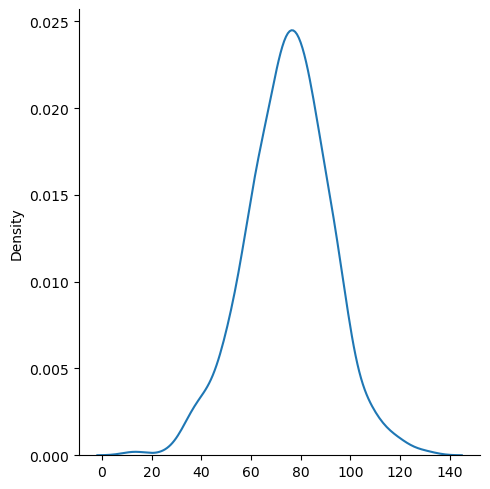

In [3]:
sns.displot(P,kind="kde" )
plt.show()
# a graph showing the distribution of P,showing that indeed the population is normal(not perfect) 

In [4]:
Pmean=np.mean(P)
Pmean
#calculated the exact mean for the population

75.05292413093098

In [5]:
s=np.random.choice(P,size=(10,50))
s
#random samples are drawn from the population P; with a sample size of 50 and 10 different trials

array([[ 34.83806043,  91.10508726,  78.49825871,  99.74119684,
         86.08192763,  56.14334108,  66.06032764,  50.69948654,
         54.59210246,  75.46295186,  72.69838685,  80.05620037,
         87.37320016,  74.51008699,  83.56340246, 107.69983874,
        105.98438536,  85.10609642,  83.38399505,  95.97018261,
         79.59038233,  91.41082921,  70.70964183,  81.05252458,
         97.72008364,  83.98931935,  90.36371857,  13.38241354,
         93.41822927,  91.96278012,  73.09331117,  74.37910334,
         95.04658078,  58.47644895,  77.78404287,  86.1045255 ,
         75.46295186,  38.6085362 ,  91.93147561,  97.01352537,
         95.97018261,  70.46382508,  75.18828821,  86.1045255 ,
         75.87097747,  79.51163687,  35.21687885, 111.95203958,
         65.55376874,  86.48643019],
       [ 97.59602235,  72.04246912,  51.29914724,  53.52563525,
         60.62673702,  47.64244863,  90.5940357 ,  40.41789847,
         44.38573207,  92.05402103, 129.60820475, 100.01680351,
   

In [6]:
sMeans=[]
for i in s:
    x=np.mean(i)
    sMeans.append(x)
sMeans #we find the mean of each trial

meanOfMeans=np.mean(sMeans)
meanOfMeans # when we find the mean of the means of the trials, 

75.55195519059102

<div><h3>3.</h3>we realize that the mean is almost as the exact mean(75.22899441035749) of the population,this is very useful in drawing inference about the population parameter when we can get to all the units in the population</div>

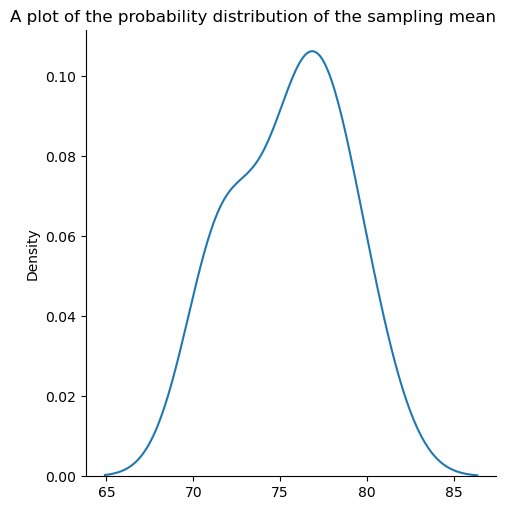

In [7]:
sns.displot(sMeans,kind="kde")
plt.title("A plot of the probability distribution of the sampling mean",loc="right")
plt.show()
# we realise that the plot is almost normal,

<div><h3>4.</h3>
    we shall extend this idea to other distribution and investigate whether their sampling distribution is normal
</div>

In [8]:
chiP=np.random.chisquare(2,size=1000)
exp=np.random.exponential(scale=20,size=1000)
gamma=np.random.gamma(2,3,size=1000)
beta=np.random.beta(3,12,size=1000)
# we simmulate an artificial data for the chisquare,exponential,gamma and beta population distribution respectively

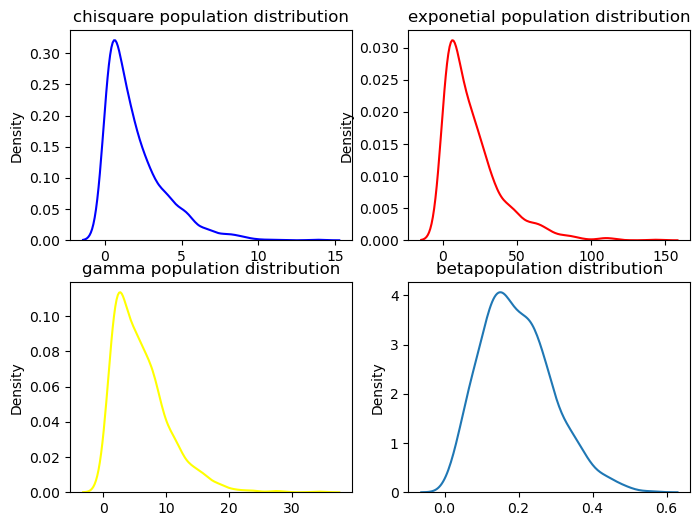

In [9]:
fig,axes=plt.subplots(2,2, figsize=(8, 6))
sns.kdeplot(chiP,ax=axes[0,0],color="blue")
axes[0,0].set_title("chisquare population distribution")

sns.kdeplot(exp,ax=axes[0,1],color="red")
axes[0,1].set_title("exponetial population distribution")

sns.kdeplot(gamma,ax=axes[1,0],color="yellow")
axes[1,0].set_title("gamma population distribution")

sns.kdeplot(beta,ax=axes[1,1])
axes[1,1].set_title("betapopulation distribution")
plt.show()
# the plots below shows the density distribution of the distinct population
#we can clearly see that their not normal

In [10]:
sampleChi=np.random.choice(chiP,size=(10,150))
sampleExp=np.random.choice(exp,size=(10,150))
sampleGamma=np.random.choice(gamma,size=(10,150))
sampleBeta=np.random.choice(beta,size=(10,150))
c=[]
e=[]
g=[]
b=[]
for i in sampleChi:
    x=np.mean(i)
    c.append(x)
for i in sampleExp:
    x=np.mean(i)
    e.append(x)
for i in sampleGamma:
    x=np.mean(i)
    g.append(x)
for i in sampleBeta:
    x=np.mean(i)
    b.append(x)
 #random samples are drawn from the various population 
 #with a sample size of 50 and 10 different trials from the different populations each 
 #we find their means also  

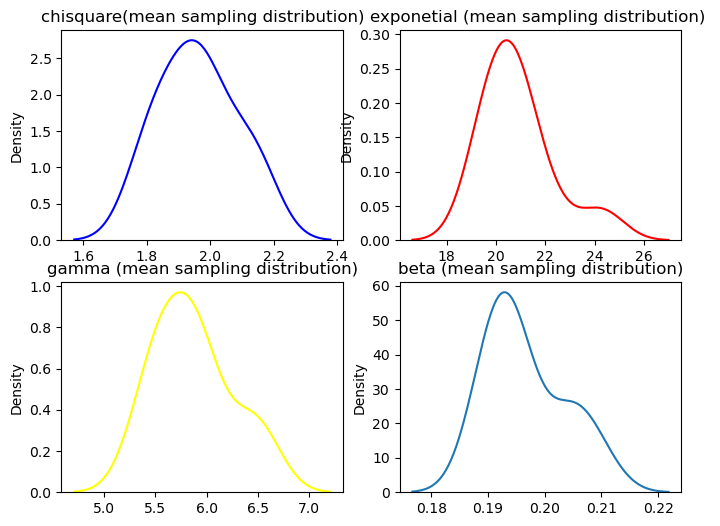

In [11]:
fig,axes=plt.subplots(2,2, figsize=(8, 6))
sns.kdeplot(c,ax=axes[0,0],color="blue")
axes[0,0].set_title("chisquare(mean sampling distribution)")

sns.kdeplot(e,ax=axes[0,1],color="red")
axes[0,1].set_title("exponetial (mean sampling distribution) ")

sns.kdeplot(g,ax=axes[1,0],color="yellow")
axes[1,0].set_title("gamma (mean sampling distribution)")

sns.kdeplot(b,ax=axes[1,1])
axes[1,1].set_title("beta (mean sampling distribution)")
plt.show()
#we plot the sampling distribution of the mean from the different poppulation samples

<div><b>comment:</b> everyone can see subjectively that the mean of the sampling distribution is approaching normal
 regardless of the population the samples come from...hence we have proven naively the central limit theorem</div>

<div><b>question:</b>try incresing the sample size of each trial and examine what happens do vice versa and examine also </div>